# Chapter 10: How to make predictions with a linear regression model

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Get the data

In [13]:
housingPath = 'housingData.csv'
housing = pd.read_csv(housingPath)

In [14]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.46155,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.00000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.25000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.00000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.00000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.50000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.00000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.00000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.00000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.00000,2300.00,9410.0


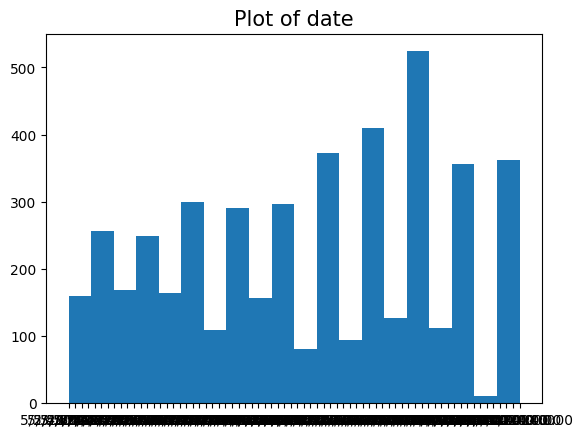

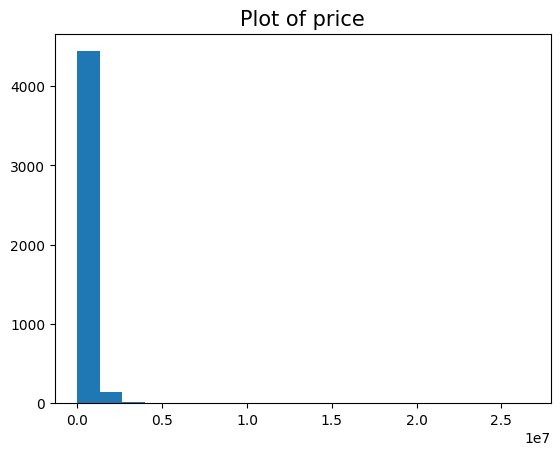

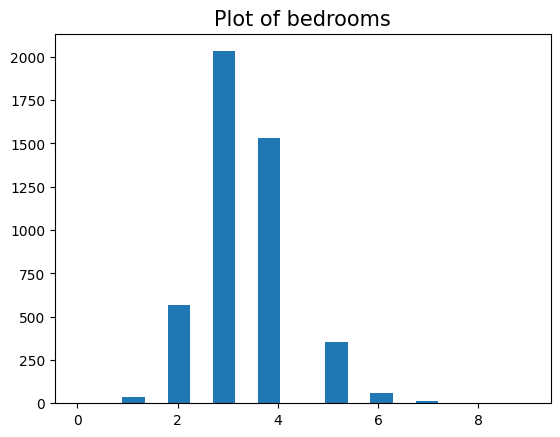

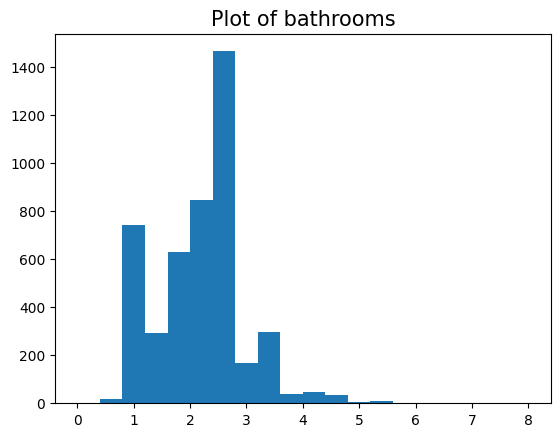

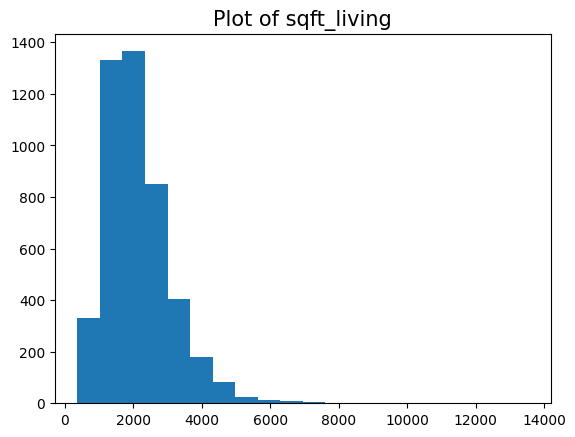

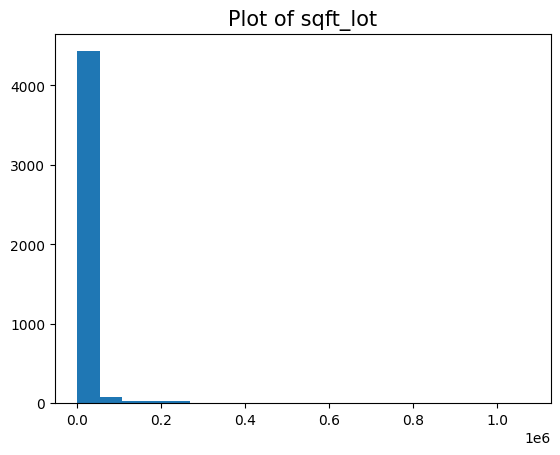

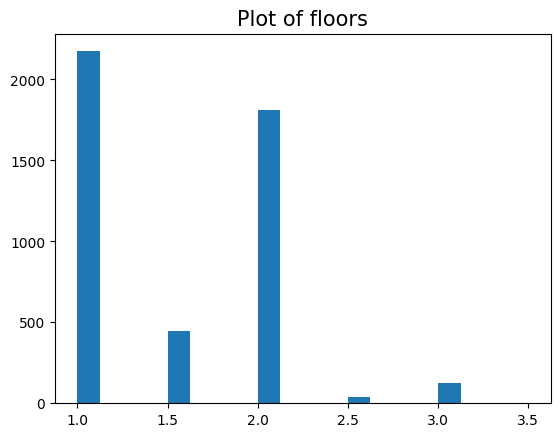

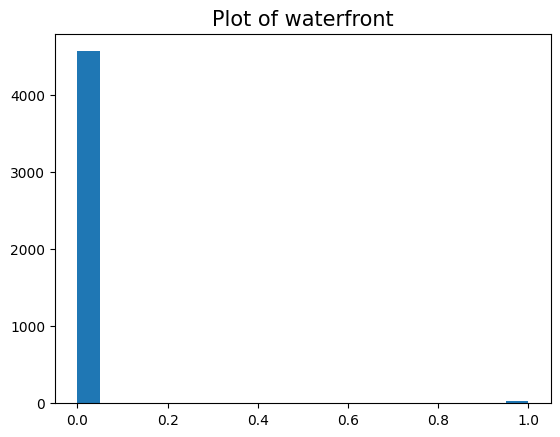

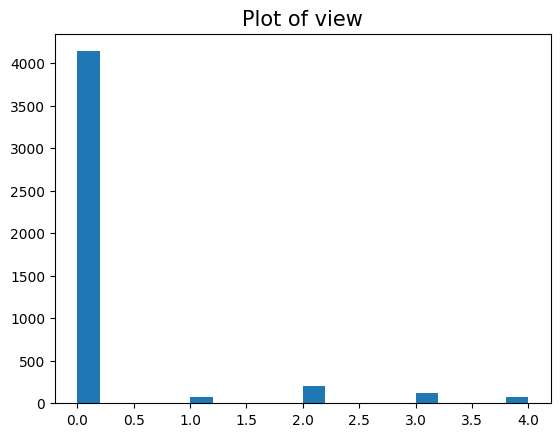

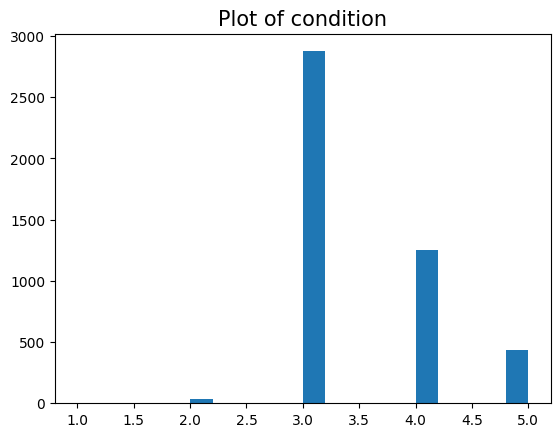

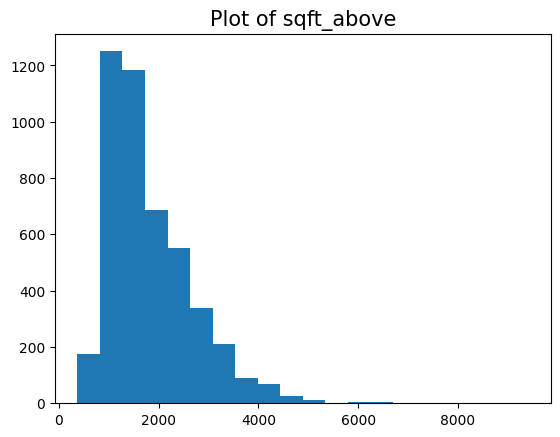

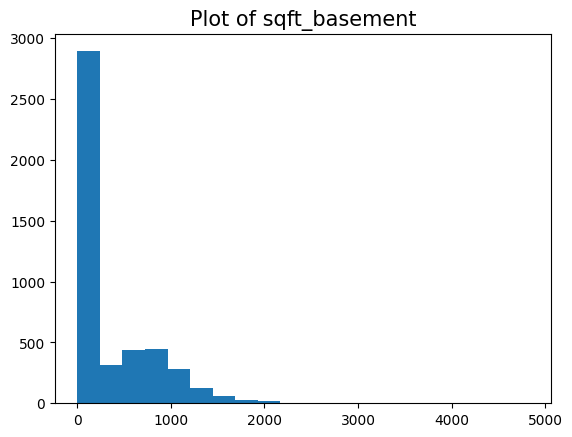

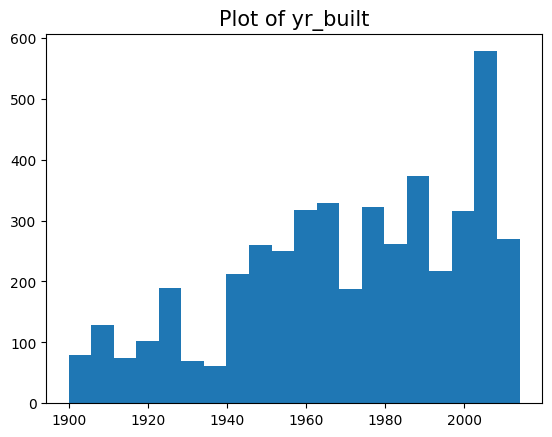

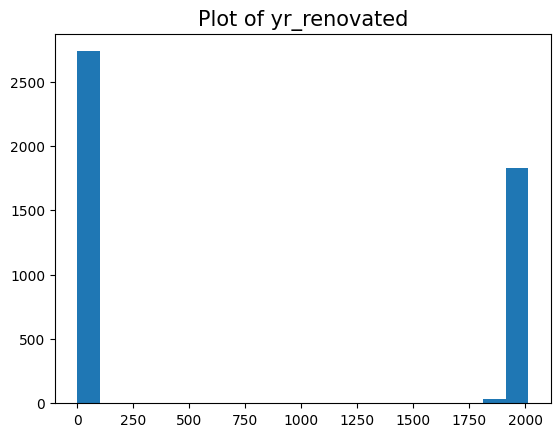

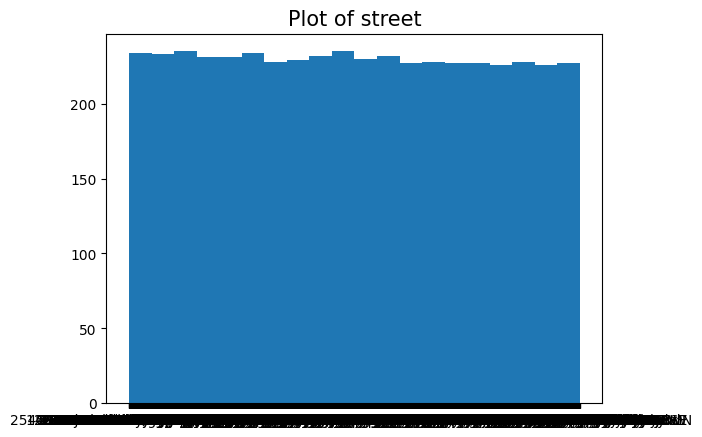

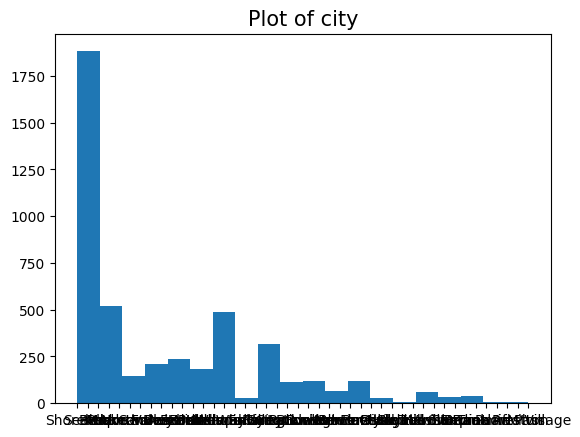

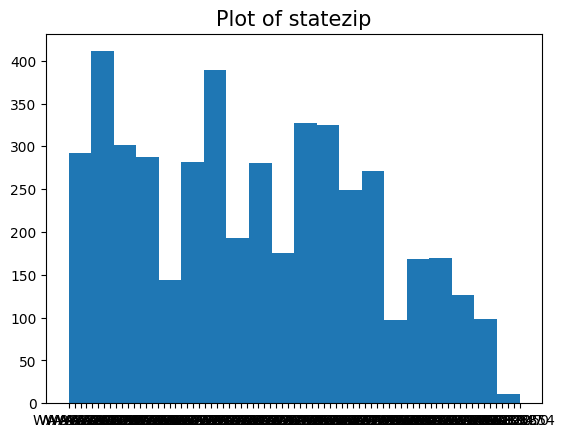

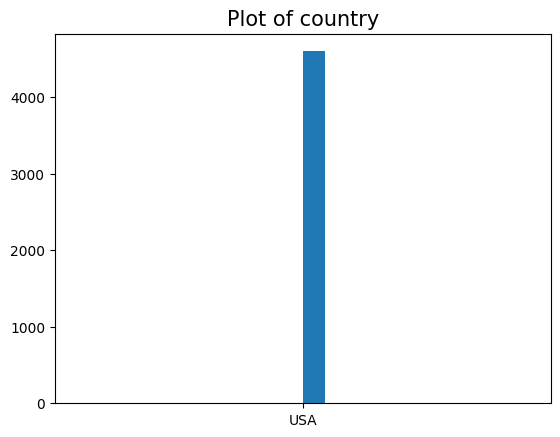

In [15]:
for c in housing.columns:
    plt.title("Plot of "+c,fontsize=15)
    plt.hist(housing[c],bins=20)
    plt.show()

In [16]:
housing.shape

(4600, 18)

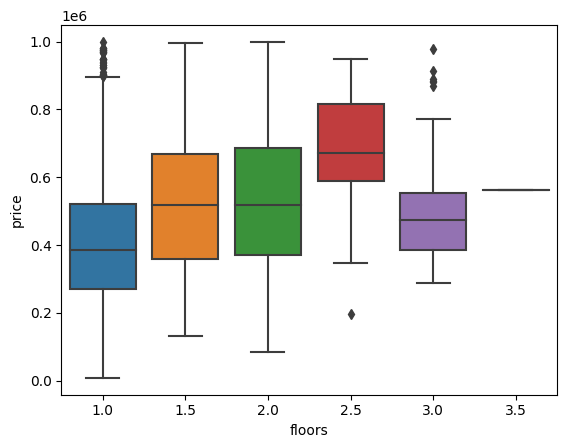

In [17]:
ax = sns.boxplot(data=housing.query('sqft_living < 8000 and price < 1000000 and price > 0'), x = 'floors',y = 'price')

In [18]:
housing = housing.query('sqft_living < 8000 and price < 1000000 and price > 0')
housing.shape

(4207, 18)

In [19]:
housing['has_basement'] = housing['sqft_basement'].apply(
    lambda x: True if x > 0 else False)
housing.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,has_basement
0,5/2/2014 0:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,False
2,5/2/2014 0:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,False
3,5/2/2014 0:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,True
4,5/2/2014 0:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,True
5,5/2/2014 0:00,490000.0,2,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA,False
6,5/2/2014 0:00,335000.0,2,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA,False
7,5/2/2014 0:00,482000.0,4,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA,False
8,5/2/2014 0:00,452500.0,3,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA,True
9,5/2/2014 0:00,640000.0,4,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA,False
10,5/2/2014 0:00,463000.0,3,1.75,1710,7320,1.0,0,0,3,1710,0,1948,1994,Burke-Gilman Trail,Lake Forest Park,WA 98155,USA,False


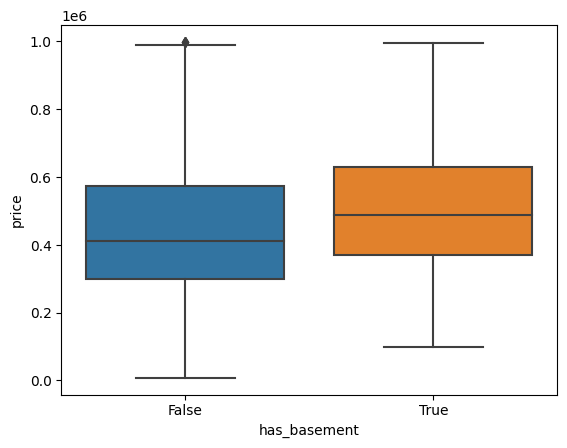

In [20]:
ax = sns.boxplot(data=housing.query('sqft_living < 8000 and price < 1000000 and price > 0'), x = 'has_basement',y = 'price')

In [21]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4207 entries, 0 to 4599
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4207 non-null   object 
 1   price          4207 non-null   float64
 2   bedrooms       4207 non-null   int64  
 3   bathrooms      4207 non-null   float64
 4   sqft_living    4207 non-null   int64  
 5   sqft_lot       4207 non-null   int64  
 6   floors         4207 non-null   float64
 7   waterfront     4207 non-null   int64  
 8   view           4207 non-null   int64  
 9   condition      4207 non-null   int64  
 10  sqft_above     4207 non-null   int64  
 11  sqft_basement  4207 non-null   int64  
 12  yr_built       4207 non-null   int64  
 13  yr_renovated   4207 non-null   int64  
 14  street         4207 non-null   object 
 15  city           4207 non-null   object 
 16  statezip       4207 non-null   object 
 17  country        4207 non-null   object 
 18  has_basement 

In [22]:
housing = housing.drop(columns=['date','street','city','statezip','country',
                                'sqft_lot','yr_renovated','sqft_basement'])

## The Housing dataset

In [23]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4207 entries, 0 to 4599
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         4207 non-null   float64
 1   bedrooms      4207 non-null   int64  
 2   bathrooms     4207 non-null   float64
 3   sqft_living   4207 non-null   int64  
 4   floors        4207 non-null   float64
 5   waterfront    4207 non-null   int64  
 6   view          4207 non-null   int64  
 7   condition     4207 non-null   int64  
 8   sqft_above    4207 non-null   int64  
 9   yr_built      4207 non-null   int64  
 10  has_basement  4207 non-null   bool   
dtypes: bool(1), float64(3), int64(7)
memory usage: 365.6 KB


In [24]:
housing.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,sqft_above,yr_built,has_basement
0,313000.0,3,1.50,1340,1.5,0,0,3,1340,1955,False
2,342000.0,3,2.00,1930,1.0,0,0,4,1930,1966,False
3,420000.0,3,2.25,2000,1.0,0,0,4,1000,1963,True
4,550000.0,4,2.50,1940,1.0,0,0,4,1140,1976,True
5,490000.0,2,1.00,880,1.0,0,0,3,880,1938,False


## How to identify correlations with a scatterplot

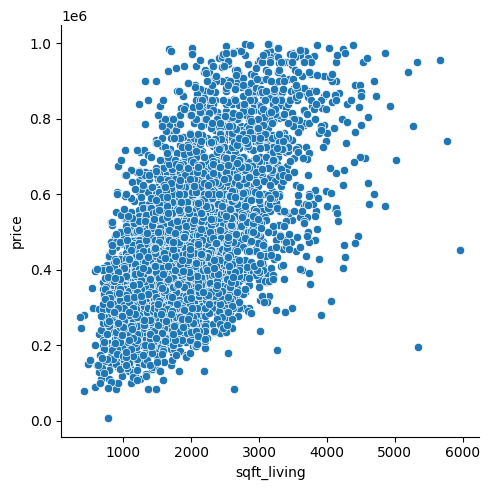

In [25]:
sns.relplot(data=housing, x='sqft_living', y='price')

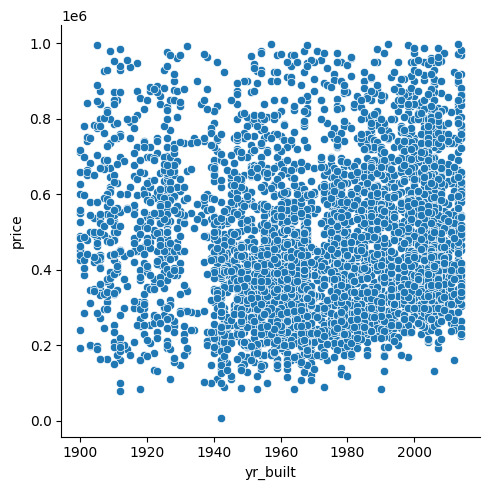

In [26]:
sns.relplot(data=housing, x='yr_built', y='price')

## How to identify correlations with a grid of scatterplots

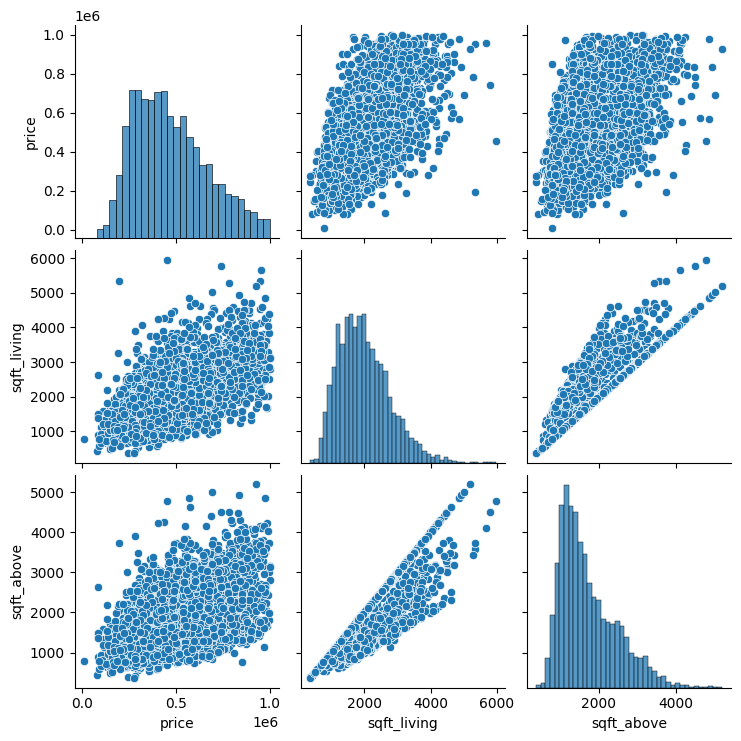

In [27]:
sns.pairplot(data=housing,
             y_vars=['price','sqft_living','sqft_above'], 
             x_vars=['price','sqft_living','sqft_above']
             #diag_kind='kde'
             )

## How to identify correlations with r-values

In [28]:
# r = coefficient of correlation

housing.corr().head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,sqft_above,yr_built,has_basement
price,1.000000,0.305046,0.460155,0.607379,0.272151,0.073671,0.196460,0.044926,0.517395,0.053012,0.152591
bedrooms,0.305046,1.000000,0.516726,0.603655,0.148377,-0.032263,0.060074,0.015105,0.466683,0.154287,0.157001
bathrooms,0.460155,0.516726,1.000000,0.715626,0.495380,0.020700,0.112797,-0.145555,0.637045,0.521801,0.127437
sqft_living,0.607379,0.603655,0.715626,1.000000,0.325647,0.030473,0.184432,-0.086310,0.848312,0.331001,0.175223
floors,0.272151,0.148377,0.495380,0.325647,1.000000,0.008710,-0.006647,-0.298350,0.526227,0.502039,-0.305249


In [29]:
housing.corr()[['price']].sort_values(by='price', ascending=False)

,price
price,1.000000
sqft_living,0.607379
sqft_above,0.517395
bathrooms,0.460155
bedrooms,0.305046
floors,0.272151
view,0.196460
has_basement,0.152591
waterfront,0.073671
yr_built,0.053012


## How to identify correlations with a heatmap

<Axes: >

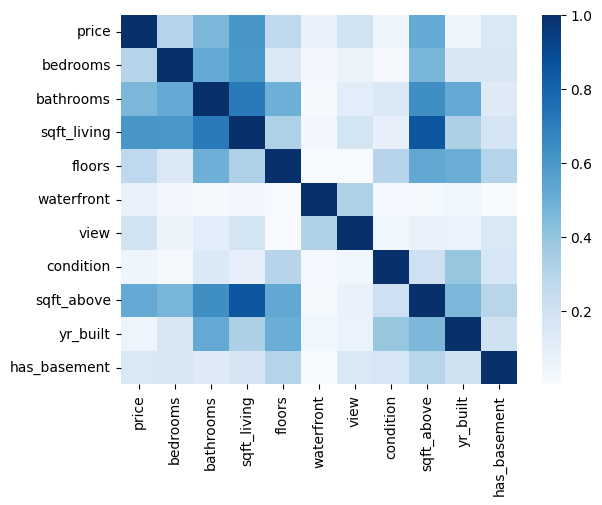

In [30]:
sns.heatmap(data=abs(housing.corr()), cmap='Blues')

<Axes: >

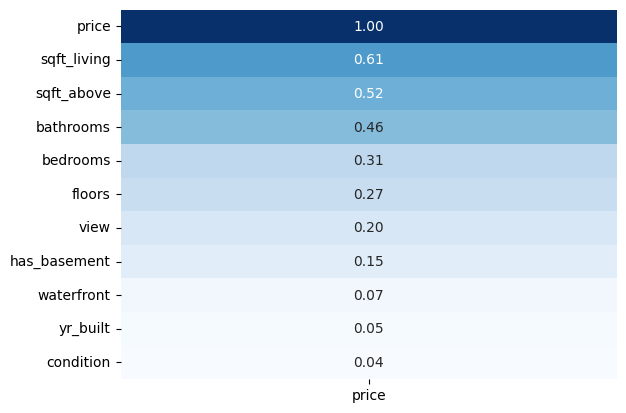

In [31]:
sns.heatmap(data=housing.corr()[['price']].sort_values(by='price', ascending=False), 
            annot=True, cmap='Blues', cbar=False, fmt=f'.2f')

## How to create, validate, and use a linear regression model

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
#r-squared = coeficient of determination
0.43**2

0.18489999999999998

In [34]:
list(housing.columns)

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'waterfront',
 'view',
 'condition',
 'sqft_above',
 'yr_built',
 'has_basement']

In [35]:
housing.price.quantile(0.95)

850000.0

In [36]:
# split the data
# x - features/influencer/predictors/independent variables
# y - target/response/label/dependent variables
housing_sample = housing.query("price < 1184050")
x_train, x_test, y_train, y_test = train_test_split(
    housing_sample[[
#  'bedrooms',
#  'bathrooms',
 'sqft_living'
#  ,
#  'floors',
#  'waterfront',
#  'view',
#  'condition',
#  'sqft_above',
#  'yr_built',
#  'has_basement'
]], housing_sample[['price']], 
# x_train, x_test, y_train, y_test = train_test_split(
#     housing_sample[[ 'sqft_living']], housing_sample[['price']], 
     test_size=0.33, random_state=4747)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2818, 1)
(1389, 1)
(2818, 1)
(1389, 1)


<Axes: ylabel='Density'>

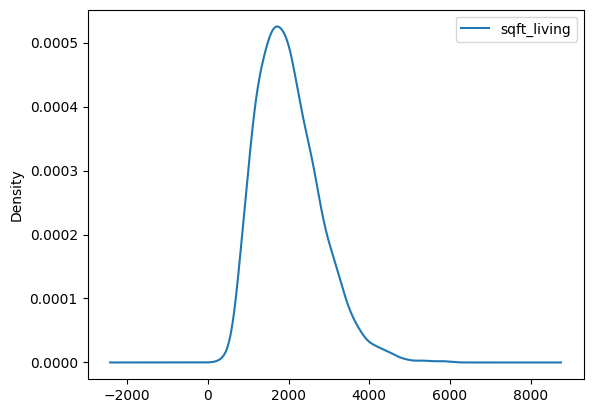

In [37]:
x_train.plot.kde()

<Axes: ylabel='Density'>

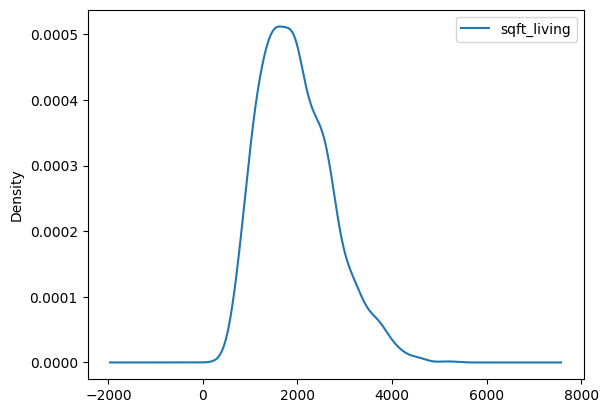

In [38]:
x_test.plot.kde()

In [41]:

# create the model from the training dataset
linearModel = LinearRegression()
linearModel.fit(x_train, y_train)
print(linearModel.score(x_train, y_train))
print(linearModel.score(x_test, y_test))



0.3675433781555254
0.3714995180720757


In [48]:
# TEST
# send test set independent variable to model
y_pred =linearModel.predict(x_test)
# evaluate how well model outputs predict test set response variable
mse = mean_squared_error(y_test, y_pred)
r_sq = r2_score(y_test, y_pred)
print(f"MSE:  {mse}")
print(f"R squared:  {r_sq}")
print(f"coefficient:  {linearModel.coef_}")
print(f"intercept:  {linearModel.intercept_}")


MSE:  23620440580.754597
R squared:  0.3714995180720757
coefficient:  [[154.16997588]]
intercept:  [164326.74057602]


In [29]:
# y = mx + b or target = coefficient*input + intercept
print( "price = {0} * sqft_living+ {1}".format(str(linearModel.coef_[0][0]),str(linearModel.intercept_[0])))

price = 151.0400190744301 * sqft_living+ 174840.020437937


In [30]:
housing["price_linreg"] = 151.0400190744301  * housing["sqft_living"] + 174840.020437937

In [44]:
housing["price_predict"] = linearModel.predict(housing[['sqft_living']])

<Axes: xlabel='price_predict', ylabel='price'>

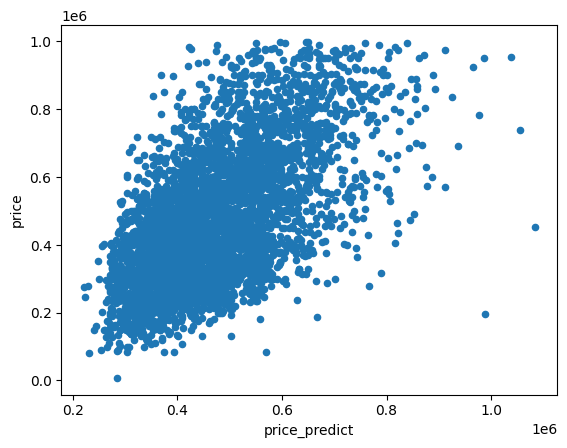

In [45]:
housing.plot.scatter( x= 'price_predict', y = "price")

In [ ]:
housing.head(5)

In [ ]:
melted = pd.melt(housing, id_vars=['sqft_living'], 
                 value_vars=['price','price_predict'], 
                 var_name='price_type', value_name='price_value')
melted

## How to plot the predicted data

In [39]:
# put predicted values in a frame
predicted = pd.DataFrame(y_predicted, columns=['price_predicted'])

# combine the test data and the predicted data
combined = predicted.join([x_test.reset_index(drop=True),
                           y_test.reset_index(drop=True)])

# melt price and price_predicted columns into a single column
melted = pd.melt(combined, id_vars=['sqft_living'], 
                 value_vars=['price','price_predicted'], 
                 var_name='price_type', value_name='price_value')

melted.head()

,sqft_living,price_type,price_value
0,2910,price,550000.0
1,1800,price,474900.0
2,4680,price,1160000.0
3,1320,price,660000.0
4,3330,price,1095000.0


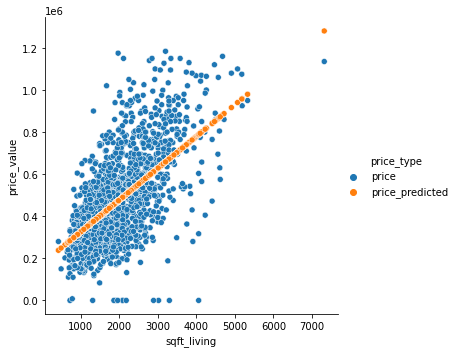

In [40]:
sns.relplot(data=melted, x='sqft_living', y='price_value', 
            hue='price_type')

## How to plot the residuals

In [41]:
combined['residual'] = combined.price - combined.price_predicted
combined.head()

,price_predicted,sqft_living,price,residual
0,614366.475945,2910,550000.0,-64366.475945
1,446712.054772,1800,474900.0,28187.945228
2,881707.309706,4680,1160000.0,278292.690294
3,374212.845616,1320,660000.0,285787.154384
4,677803.283956,3330,1095000.0,417196.716044


In [42]:
combined.residual.max()

702611.1419854357

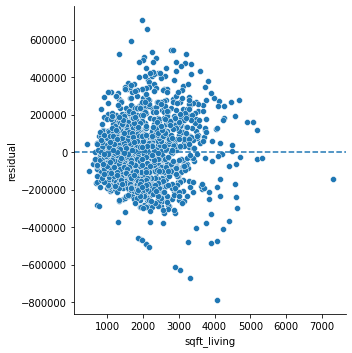

In [43]:
g = sns.relplot(data=combined, x='sqft_living', y='residual')

# draw a horizontal line where the Y axis is 0
for ax in g.axes.flat:    
    ax.axhline(0, ls='--')

<AxesSubplot:ylabel='Frequency'>

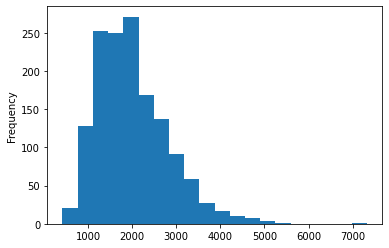

In [44]:
combined.sqft_living.plot.hist(bins=20)

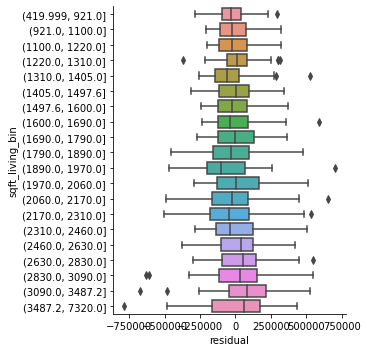

In [45]:
combined["sqft_living_bin"] = pd.qcut(combined.sqft_living, q=20)
sns.catplot(data = combined , kind='box', y="sqft_living_bin",x="residual" , orient='h')

## How to plot a linear regression

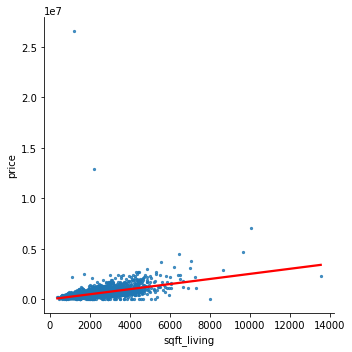

In [46]:
sns.lmplot(data=housing, x='sqft_living', y='price', ci=None,
           scatter_kws={'s':5}, line_kws={'color':'red'})

In [47]:
!pip install statsmodels


You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


## How to plot a logistic regression

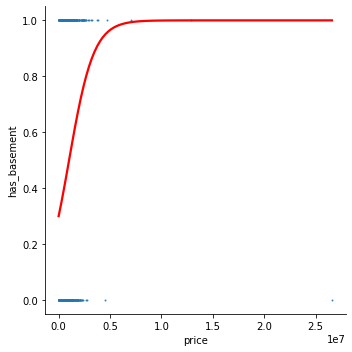

In [48]:
sns.lmplot(data=housing, x='price', y='has_basement', ci=None,
           scatter_kws={'s':1}, line_kws={'color':'red'}, 
           logistic=True)

## How to plot a polynormal regression

In [49]:
# get the data
mortality_data = pd.read_pickle('mortality_data.pkl')
mortality_data.head()

,Year,AgeGroup,DeathRate
0,1900,01-04 Years,1983.8
1,1901,01-04 Years,1695.0
2,1902,01-04 Years,1655.7
3,1903,01-04 Years,1542.1
4,1904,01-04 Years,1591.5


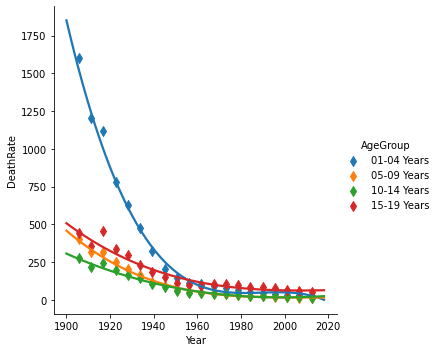

In [50]:
sns.lmplot(x='Year', y='DeathRate', hue='AgeGroup', data=mortality_data, ci=None,
           markers='d', x_bins=20, order=3)

## How to plot a lowess regression

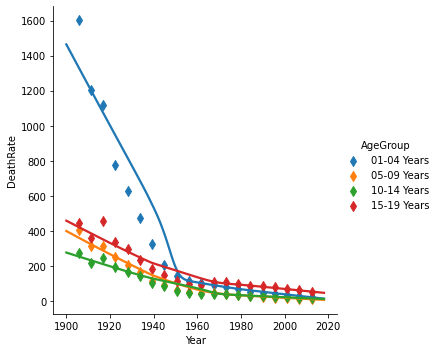

In [51]:
sns.lmplot(data=mortality_data, x='Year', y='DeathRate', hue='AgeGroup', 
           ci=None, markers='d', x_bins=20, lowess=True)

## How to plot residuals with Seaborn

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

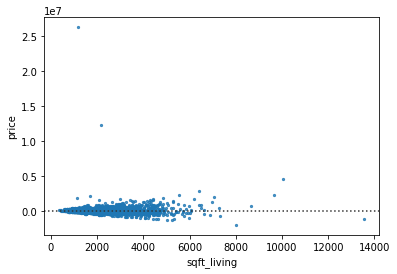

In [52]:
sns.residplot(data=housing, x='sqft_living', y='price', 
              scatter_kws={'s':5})

<AxesSubplot:xlabel='Year', ylabel='DeathRate'>

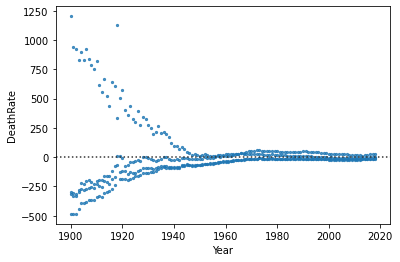

In [53]:
sns.residplot(data=mortality_data, x='Year', y='DeathRate', 
              order=3, scatter_kws={'s':5})